**#####################################################################**<br></br>
EHS Integration and Engineering Solutions<br></br>
<br></br>
COVID-19 data analysis - https://github.com/ehsintegration/COVID-19<br></br>
<br></br>
To evaluate an In[] cell, Click on the cell, and press shift-enter.<br></br>
**#####################################################################**<br></br>

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import matplotlib.dates as mdates
import datetime
import math
from scipy import optimize

In [3]:
1+1 

2

#####################################################################<br></br>
The following is how you import an object:<br></br>
    <br></br>
This object lets you access files from the GITHUB repository of files<br></br>
its where all of the COVID-19 data is kept.<br></br>
<br></br>
What is GITHUB : https://en.wikipedia.org/wiki/GitHub<br></br>
<br></br>
Documentation  : https://pygithub.readthedocs.io/en/latest/<br></br>
#####################################################################<br></br>

In [4]:
from github import Github

#####################################################################<br></br>
When you import the github library, an object called g needs to be<br></br>
created. This object will represent the github object that we will use<br></br>
to pull data from the github repository. You will be able to pull data <br></br>
from your own personal repository, or any repository that exits in<br></br>
github.<br></br>
<br></br>
This object will be used to access any file or directory within the <br></br>
github "filesystem".<br></br>
<br></br>
For this access to occur you need to insert your personal github<br></br>
username and password. If you dont have one, you would need to creat a<br></br>
github account. Please note that the fields below are exactly what<br></br>
you would enter when prompted when logging into the github site.<br></br>
#####################################################################<br></br>

In [5]:
#g = Github("username", "password")

#####################################################################<br></br>
In the following command we create another object called<br></br>
repo (short for repository of files), and assign it to a specific <br></br>
repository. Specifically the John Hopikns repository located at: <br></br>
https://github.com/CSSEGISandData/COVID-19<br></br>
#####################################################################<br></br>

In [6]:
repo = g.get_repo("CSSEGISandData/COVID-19")

#####################################################################<br></br>
Here, we are getting the list of all the contents in the repository<br></br>
for COVID-19, and then listing all of the directories and files:<br></br>
    <br></br>
The following will list all of the contents of <br></br>
the https://github.com/CSSEGISandData/COVID-19 repository of files.<br></br>
#####################################################################<br></br>

In [72]:
contents = repo.get_contents("")

#####################################################################<br></br>
The oblect contents is now created, and it is a list of files and<br></br>
directories. These are stored in what is called a list.<br></br>
#####################################################################<br></br>

In [73]:
print(contents)

[ContentFile(path=".gitignore"), ContentFile(path="README.md"), ContentFile(path="archived_data"), ContentFile(path="csse_covid_19_data"), ContentFile(path="who_covid_19_situation_reports")]


#####################################################################<br></br>
Next, we have the python syntax to iterate through all of the members<br></br>
of the list, one at a time, index is the variable used to iterate.<br></br>
#####################################################################<br></br>

In [74]:
for index in contents:
    print(index)

ContentFile(path=".gitignore")
ContentFile(path="README.md")
ContentFile(path="archived_data")
ContentFile(path="csse_covid_19_data")
ContentFile(path="who_covid_19_situation_reports")


#####################################################################<br></br>
Get the list of files from the directory that we are interested in.<br></br>
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports<br></br>
The files in this directory contains all of the data in CSV comma seperated<br></br>
file. There is a file for each day, and each line represents the amounts<br></br>
measured and reported for that day. Click on the link above, and explore<br></br>
the contents of each file. You will see the reporting structure for each <br></br>
line. The object contents below, will contain a list of all of the files.<br></br>
We will once again iterate with the index variable, and use it to iterate <br></br>
over all of the files in the directory.<br></br>
#####################################################################<br></br>

In [75]:
contents = repo.get_contents("csse_covid_19_data/csse_covid_19_daily_reports")

In [76]:
count = 1
for index in contents:
    url = index.download_url
    print(url)
    count = count + 1

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/.gitignore
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-

#####################################################################<br></br>
Here we are pulling in another object called BS4, which stands for<br></br>
Beautiful Soup 4. We will use the Beautiful Soup Object to fetch web data. <br></br>
Beautiful soup is normally used to parse HTML, but we are just using <br></br>
it to download the file and convert it to a string. We will be using the<br></br>
list of urls for each file above to download all of the files into one<br></br>
long array of lines. This long array will have all of the line entries<br></br>
for all of the files concatenated together. <br></br>
Note, that we have a check below to ensure, that we only use files that <br></br>
have the .csv extension.<br></br>
<br></br>
The next section will create an array of files in an object called files.<br></br>
#####################################################################<br></br>

In [77]:
import bs4 as bs
import urllib.request

In [78]:
# all_data will be an array of lines that will contain all of the data.
# we are clearing the array here.
all_data = []
files    = []

days     = 0

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (".csv" in url):
        print(url)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        decoded_data = source.decode("utf-8")
        
        files.append(decoded_data)   
        days = days + 1

print("Done")

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-31-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

#####################################################################<br></br>
Print a file from the file list. files[0] is the first file, and file[1]<br></br>
is the second file. It should correlate to the second link listed above.<br></br>
#####################################################################<br></br>

In [79]:
print(len(files))

77


#####################################################################<br></br>
This routine below, create three dictionaries, that will be used later.<br></br>
The first is conf_dict: <br></br>
  This dictionary uses the reporting city/location as an index, and a<br></br>
  list of value pairs [sample day number, value], [s2.v2], ...., the value<br></br>
  stored is the number of confirmed reports per location.<br></br>
The second is death_dict: <br></br>
  This dictionary uses the reporting city/location as an index, and a<br></br>
  list of value pairs [sample day number, value], [s2.v2], ...., the value<br></br>
  stored is the number of death reports per location.<br></br>
The third dictionary is country_dictionary:<br></br>
  This disctionary uses the reporting city/location as an index, and a<br></br>
  list of value pairs [sample day number, value], [s2.v2], ...., the value<br></br>
  is initialized to zero. This is just used to maintain a list of reporting<br></br>
  locations. <br></br>
<br></br>
Since, the cumlative totals are per city. We will create three <br></br>
dictionaries, that will have the city as an index, and contain the total<br></br>
confirmed and death for that city. We will later iterate through all <br></br>
of the cities in a day, in order to calculate the true running total.<br></br>
#####################################################################<br></br>

In [80]:
# This function is used to modifiy a string where a comma exists between to quotes
# ["Miami,Fl",US,2,3,4,6] becomes ["Miami Fl",US,2,3,4,6]
#
# This is needed because there are fields in the CSV file with commas,
# and this throws off the array split function
#
# Function : StringFix
def strfix(value):
    nl = ''
    flag = bool(False)
    for i in range(0,len(value)):
        if (value[i].find('"')>=0):
            flag = not(bool(flag))            
        if( (value[i]==",") and (flag==True) ):
            nl = nl + ' '
        else:
            nl = nl + value[i]             
    return(nl)

In [81]:
# Dictionaries
#
conf_dict     = {}   # dictionary of confirmed per city
death_dict    = {}   # dictionary of deaths per city
rec_dict      = {}
country_dict  = {}

sample = 0

# Collect postion vs confirmation
lat         = []
lon         = []
con         = []

# Print Sample events of death reporting
#
for index in range(0,len(files)):
        
    # Take the long string and split it for every newline character \n
    file = files[index].split('\n')
       
    CNT        = 0 
    state      = 0
    confirmed  = 0
    death      = 0
    recovered  = 0
    date       = 0
    latitude   = 0
    longitude  = 0  
    
    # Now iterate for every line in the array called "array"
    for line in file: 
        
        # Use the first line for index location, this is highly needed
        # because the location of the reuired elements changes throughout time
        # in the files, and is not consistent.
        if (line.find("Confirmed")>=0):
            newline = line.strip('\r')
                     
            newline = strfix(newline)
            data = newline.split(',')
            
            new_fields = len(data)
                     
            for i in range(0,new_fields):
                if (data[i].find("Country")>=0): 
                    CNT        = i 
                elif (data[i].find("State")>=0): 
                    state      = i
                elif (data[i].find("Confirmed")>=0): 
                    confirmed  = i
                elif (data[i].find("Death")>=0): 
                    death      = i
                elif (data[i].find("Recovered")>=0): 
                    recovered  = i
                elif (data[i].find("Update")>=0): 
                    date       = i
                elif (data[i].find("Lat")>=0): 
                    latitude   = i
                elif (data[i].find("Long")>=0): 
                    longitude  = i   
                             
        # Make sure its not the first line that has a text header and no valuable data
        else:
                
            # Remove any \r delimiter characters. Google what \r and \n are
            # used for. Traditionaly they are used to indicate the end of a line.
            # Sometimes only one is used, and sometimes both are used. In this
            # case they are both used, and we already split the lines based on \n
            # which means we need to strip the special character from each line.
            newline = line.strip('\r')
                
            # Finally append the new line to the array called all_data
            newline = strfix(newline)
            data = newline.split(',')
            
            #print(data)
            #print(len(data))
            
            if (len(data)>=6):
                
                # Correct all of the running name chnages that have occurred over time.
                #
                # China was renamed from "Mainland China" to "China"
                # This corrects that.
                cnt = data[CNT]
                if ("China" in cnt) : cnt = "China"
                if ("Kong" in cnt)  : cnt = "China"
                if ("Korea" in cnt) : cnt = "South Korea"
                    
                key = cnt + "-" + str(data[state])
                
                # Build country dictionary, will latter be forced to fix size
                # what is pushed is not important
                country_dict.setdefault(cnt, []).append(0)
                  
                # Does the confirmed field have a number, sometimes it is '', empty
                if(len(data[confirmed]) > 0):
                    # Is the number greater than zero
                    if (int(data[confirmed]) > 0):
                        conf_dict.setdefault(key, []).append([sample,int(data[confirmed])])
                    else:
                        conf_dict.setdefault(key, []).append([sample,0])
                else:
                    conf_dict.setdefault(key, []).append([sample,0])
                    
                # Does the death field have a number, sometimes it is '', empty
                if(len(data[death]) > 0):
                    # Is the number greater than zero
                    if (int(data[death]) > 0):
                        death_dict.setdefault(key, []).append([sample,int(data[death])])
                    else:
                        death_dict.setdefault(key, []).append([sample,0]) 
                else:
                    death_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does the recovered field have a number, sometimes it is '', empty
                if(len(data[recovered]) > 0):
                    # Is the number greater than zero
                    if (int(data[recovered]) > 0):
                        rec_dict.setdefault(key, []).append([sample,int(data[recovered])])
                    else:
                        rec_dict.setdefault(key, []).append([sample,0]) 
                else:
                    rec_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does Latitude have a valid positive number for continental US only
                if ((len(data[longitude]) > 0) and (longitude > 0) ):
                              
                    # Does Longitude have a negative number for continental US only
                    if (float(data[longitude]) < 0.0):  # eliminate Guam
                    
                        # Append data to arrays. We have an Array for Number Confirmed, Latitude, and Longitude
                        # The number confirmed will be used for the size of the red dot.
                        con.append(float(data[confirmed]))
                        lat.append(float(data[latitude]))
                        lon.append(float(data[longitude]))
                    
    sample = sample + 1


#####################################################################<br></br>
The section traverses all of the dictionaries and calculates three <br></br>
additional dictionaries. The three dictionaries use the country as the<br></br>
index. Therefore, all of the city subtotals are added, to obtain a list <br></br>
of a single country total, for each day.<br></br>
<br></br>
The three dictionary of lists are for confirmed, death and percent.<br></br>
<br></br>
Please review the data produced. Notice that some of the locations stopped<br></br>
reporting, and have subsequent zeros. This is because the reportng structure <br></br>
has changed over time. For Hong Kong went from an independant report, and<br></br>
moved to a subtotal of China as a whole.<br></br>
#####################################################################<br></br>

In [82]:
state_conf_dict    = {}
state_death_dict   = {}
state_rec_dict     = {}

country_conf_dict  = {}
country_death_dict = {}
country_rec_dict   = {}
country_perc_dict  = {} 

Dcountry_conf_dict  = {}
Dcountry_death_dict = {}
Dcountry_rec_dict   = {}
Dcountry_perc_dict  = {} 

print(days)
    
# Reset totals for country dictionary
for city in conf_dict:
    state_conf_dict[city]   = np.zeros(days)
    state_death_dict[city]  = np.zeros(days)
    state_rec_dict[city]  = np.zeros(days)

for CNT in country_dict:
    country_conf_dict[CNT]  = np.zeros(days)  
    country_death_dict[CNT] = np.zeros(days)
    country_rec_dict[CNT]   = np.zeros(days)
    country_perc_dict[CNT]  = np.zeros(days)
    
# Reset totals for country dictionary
for CNT in country_dict:
    Dcountry_conf_dict[CNT]  = np.zeros(days-1)  
    Dcountry_death_dict[CNT] = np.zeros(days-1)
    Dcountry_rec_dict[CNT]   = np.zeros(days-1)
    Dcountry_perc_dict[CNT]  = np.zeros(days-1)
   
# Daily total for all of the cities summed together
for city in conf_dict:
    CNT = city.split('-')[0]
     
    if (CNT in country_dict):
        for i in range(0,len(conf_dict[city])):
            cs = conf_dict[city][i][0]
            cv = conf_dict[city][i][1] 
            ds = death_dict[city][i][0]
            dv = death_dict[city][i][1] 
            rs = rec_dict[city][i][0]
            rv = rec_dict[city][i][1] 
            country_conf_dict[CNT][ cs ] = int(country_conf_dict[CNT][ cs ]) + int( cv )
            country_death_dict[CNT][ ds ] = int(country_death_dict[CNT][ ds ]) + int( dv )
            country_rec_dict[CNT][ rs ] = int(country_rec_dict[CNT][ rs ]) + int( rv )
    
            if ("US" in CNT):
                state_conf_dict[city][ cs ] = int(state_conf_dict[city][ cs ]) + int( cv )
                state_death_dict[city][ ds ] = int(state_death_dict[city][ ds ]) + int( dv )
                state_rec_dict[city][ rs ] = int(state_rec_dict[city][ rs ]) + int( rv )

# Look for unreported gaps is extend last measurement
# ....106. 108. 147. 171. 171. 171. 348.] becomes
# ....106. 108. 147. 171.  0.    0. 348.]
#
for CNT in country_dict:
    for i in range(0,len(country_rec_dict[CNT])):
        if (country_rec_dict[CNT][i] == 0) and (country_rec_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found recovered gaps for " + CNT + ", and corrected" )
             country_rec_dict[CNT][ i ] = country_rec_dict[CNT][ (i - 1) ]
        if (country_conf_dict[CNT][i] == 0) and (country_conf_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_conf_dict[CNT][ i ] = country_conf_dict[CNT][ (i - 1) ]
        if (country_death_dict[CNT][i] == 0) and (country_death_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_death_dict[CNT][ i ] = country_death_dict[CNT][ (i - 1) ]

# Calculate the percent death rate over time
#
for CNT in country_dict:
    for i in range(0,len(country_perc_dict[CNT])):
        # Check to avoid divde by zero
        if (country_conf_dict[CNT][i] > 0.0):
            country_perc_dict[CNT][i] = (country_death_dict[CNT][i] / country_conf_dict[CNT][i]) * 100.0
        else:
            country_perc_dict[CNT][i] = 0.0
   
# Calc Derivatives 
#
for CNT in country_dict:
    for i in range(1,len(country_rec_dict[CNT])):
        Dcountry_rec_dict[CNT][ i-1 ]   = (country_rec_dict[CNT][ i ]   - country_rec_dict[CNT][ i-1 ]) 
        Dcountry_conf_dict[CNT][ i-1 ]  = (country_conf_dict[CNT][ i ]  - country_conf_dict[CNT][ i-1 ])  
        Dcountry_death_dict[CNT][ i-1 ] = (country_death_dict[CNT][ i ] - country_death_dict[CNT][ i-1 ]) 
        Dcountry_perc_dict[CNT][ i-1 ]  = (country_perc_dict[CNT][ i ]  - country_perc_dict[CNT][ i-1 ])  


# Display the data
#
for CNT in country_dict:
    print(CNT)
    print(country_conf_dict[CNT])
    print(country_death_dict[CNT])
    print(country_rec_dict[CNT])
    print(country_perc_dict[CNT])   

77
China
[  547.   641.   918.  1404.  2070.  2871.  5502.  6080.  8134.  9795.
 11884. 16622. 19708. 23697. 27430. 30577. 34100. 36804. 39819. 42344.
 44376. 44749. 59885. 66348. 68403. 70503. 72424. 74201. 74609. 75067.
 75540. 76991. 77012. 77231. 77744. 78156. 78590. 78918. 79346. 79922.
 80126. 80251. 80376. 80527. 80680. 80760. 80813. 80850. 80877. 80921.
 80932. 80945. 80977. 81003. 81033. 81058. 81102. 81156. 81250. 81305.
 81397. 81496. 81591. 81661. 81782. 81897. 81999. 82122. 82198. 82279.
 82361. 82432. 82511. 82543. 82602. 82665. 82718.]
[  17.   18.   26.   42.   56.   82.  131.  133.  171.  213.  259.  361.
  425.  491.  563.  633.  718.  805.  905. 1012. 1112. 1117. 1369. 1521.
 1663. 1766. 1864. 2003. 2116. 2238. 2238. 2443. 2445. 2595. 2665. 2717.
 2746. 2790. 2837. 2872. 2914. 2947. 2983. 3015. 3044. 3072. 3100. 3123.
 3139. 3161. 3172. 3180. 3193. 3203. 3217. 3230. 3241. 3249. 3253. 3259.
 3265. 3274. 3281. 3285. 3291. 3296. 3299. 3304. 3308. 3309. 3316. 3322.
 3326

 11. 11.  9.  9.  9.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  3.  3.  3.  3.  4. 15. 15. 15. 22. 23. 28. 28.
 28. 33. 37. 45. 47.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.05263158 0.86206897 2.41935484 2.27272727 2.05479452 3.08641975
 2.7932

 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         9.09090909
 9.09090909 5.55555556 5.555555

In [83]:
print(rec_dict['US-"Hillsborough  FL"'])
#print(rec_dict.keys())
print(country_rec_dict['US'])

[[40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0]]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 5.0000e+00 5.0000e+00 5.0000e+00 5.0000e+00 6.0000e+00 6.0000e+00
 6.0000e+00 7.0000e+00 7.0000e+00 7.0000e+00 7.0000e+00 8.0000e+00
 8.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00
 8.0000e+00 8.0000e+00 1.2000e+01 1.2000e+01 1.2000e+01 1.2000e+01
 1.7000e+01 1.7000e+01 1.0600e+02 1.0800e+02 1.4700e+02 1.7100e+02
 1.7100e+02 1.7100e+02 3.4800e+02 3.6100e+02 6.8100e+02 8.6900e+02
 1.0720e+03 2.6650e+03 5.6440e+03 7.0240e+03 8.4740e+03 9.0010e+03
 9.7070e+03 1.4652e+04 1.7448e+04 1.9581e+04 2.1763e+04]


#####################################################################<br></br>
<br></br>
Create list of dates starting on 1-22-2020<br></br>
<br></br>
#####################################################################<br></br>

In [84]:
# Print the total number of reporting days we have
print(days)

77


In [85]:
# Population in the milllions, obtained from Wolframalpha

population_dict = {}

population_dict['California']     = 39.54
population_dict['Texas']          = 28.3
population_dict['Florida']        = 20.98
population_dict['New York']       = 19.85
population_dict['Pennsylvania']   = 12.81
population_dict['Illinois']       = 12.8
population_dict['Ohio']           = 11.66
population_dict['Georgia']        = 10.43
population_dict['North Carolina'] = 10.27
population_dict['Michigan']       = 9.962
population_dict['New Jersey']     = 9.006
population_dict['Virginia']       = 8.47
population_dict['Washington']     = 7.406
population_dict['Arizona']        = 7.016
population_dict['Massachusetts']  = 6.86
population_dict['Tennessee']      = 6.716
population_dict['Indiana']        = 6.667
population_dict['Missouri']       = 6.114
population_dict['Maryland']       = 6.052
population_dict['Wisconsin']      = 5.795
population_dict['Colorado']       = 5.607
population_dict['Minnesota']      = 5.577
population_dict['South Carolina'] = 5.024
population_dict['Alabama']        = 4.875
population_dict['Louisiana']      = 4.684
population_dict['Kentucky']       = 4.454
population_dict['Oregon']         = 4.143
population_dict['Oklahoma']       = 3.931
population_dict['Connecticut']    = 3.588
population_dict['Iowa']           = 3.146
population_dict['Utah']           = 3.102
population_dict['Arkansas']       = 3.004
population_dict['Nevada']         = 2.998
population_dict['Mississippi']    = 2.984
population_dict['Kansas']         = 2.913
population_dict['New Mexico']     = 2.088
population_dict['Nebraska']       = 1.92
population_dict['West Virginia']  = 1.816
population_dict['Idaho']          = 1.717
population_dict['Hawaii']         = 1.428
population_dict['New Hampshire']  = 1.343
population_dict['Maine']          = 1.336
population_dict['Rhode Island']   = 1.06
population_dict['Montana']        = 1.05 
population_dict['Delaware']       = 0.961939
population_dict['South Dakota']   = 0.869666
population_dict['North Dakota']   = 0.755393
population_dict['Alaska']         = 0.739795
population_dict['District of Columbia'] = 0.693972
population_dict['Vermont']        = 0.623657
population_dict['Wyoming']        = 0.579315


In [86]:
# Population adjust , create list of population adjusted cases, only used for sorted keys in next step
#
state_conf_adjust={}
for CNT in state_conf_dict:
    print(CNT)
    cnt   = str(CNT).split('-')[0]
    state = str(CNT).split('-')[1]
    if (str(population_dict.keys()).find(state) >= 0) and ("US" in cnt):
            x = range(0,len(state_conf_dict[CNT]))
            state_conf_adjust[CNT] = state_conf_dict[CNT] / population_dict[state]
print(state_conf_adjust.keys())

China-Anhui
China-Beijing
China-Chongqing
China-Fujian
China-Gansu
China-Guangdong
China-Guangxi
China-Guizhou
China-Hainan
China-Hebei
China-Heilongjiang
China-Henan
China-Hong Kong
China-Hubei
China-Hunan
China-Inner Mongolia
China-Jiangsu
China-Jiangxi
China-Jilin
China-Liaoning
Macau-Macau
China-Ningxia
China-Qinghai
China-Shaanxi
China-Shandong
China-Shanghai
China-Shanxi
China-Sichuan
Taiwan-Taiwan
China-Tianjin
China-Tibet
US-Washington
China-Xinjiang
China-Yunnan
China-Zhejiang
Japan-
Thailand-
South Korea-
Singapore-
Philippines-
Malaysia-
Vietnam-
Australia-
Mexico-
Brazil-
Colombia-
US-Chicago
France-
US-Illinois
Nepal-
US-California
US-Arizona
Canada-Ontario
Cambodia-
Sri Lanka-
Ivory Coast-
Australia-New South Wales
Australia-Victoria
Canada-British Columbia
Germany-Bavaria
Finland-
United Arab Emirates-
Australia-Queensland
India-
Italy-
UK-
Russia-
Sweden-
Germany-
US-"Chicago  IL"
Australia-South Australia
Spain-
US-"Boston  MA"
US-"Los Angeles  CA"
US-"Orange  CA"
US-"

In [87]:
# Sort the adjusted confirmed popultion
#
def lastelem(elem):
    #print(elem)
    #print(len(elem))
    lelem = len(elem[1])
    #print(len(elem[1]))
    #print(elem[1][lelem-1])
    return (elem[1][lelem-1])

state_conf_adjust_sort = sorted(state_conf_adjust.items(), key=lastelem, reverse=True)

for location in state_conf_adjust_sort:
    lelem = len(location[1])
    if (location[1][lelem-1] > 1000):
        #print(location[0])
        #print(len(location))
        print(location[0],end=",")
        print(location[1][lelem-1],end=",")
print("")

US-New York,7046.599496221662,US-New Jersey,4931.823228958472,US-Louisiana,3476.515798462852,US-Massachusetts,2216.0349854227406,US-Connecticut,2168.617614269788,US-Michigan,1904.236097169243,US-District of Columbia,1745.027176888981,US-Washington,1173.6429921685121,US-Pennsylvania,1159.4847775175645,US-Rhode Island,1159.433962264151,


#####################################################################<br></br>
<br></br>
Log plot<br></br>
<br></br>
#####################################################################<br></br>

<IPython.core.display.Javascript object>


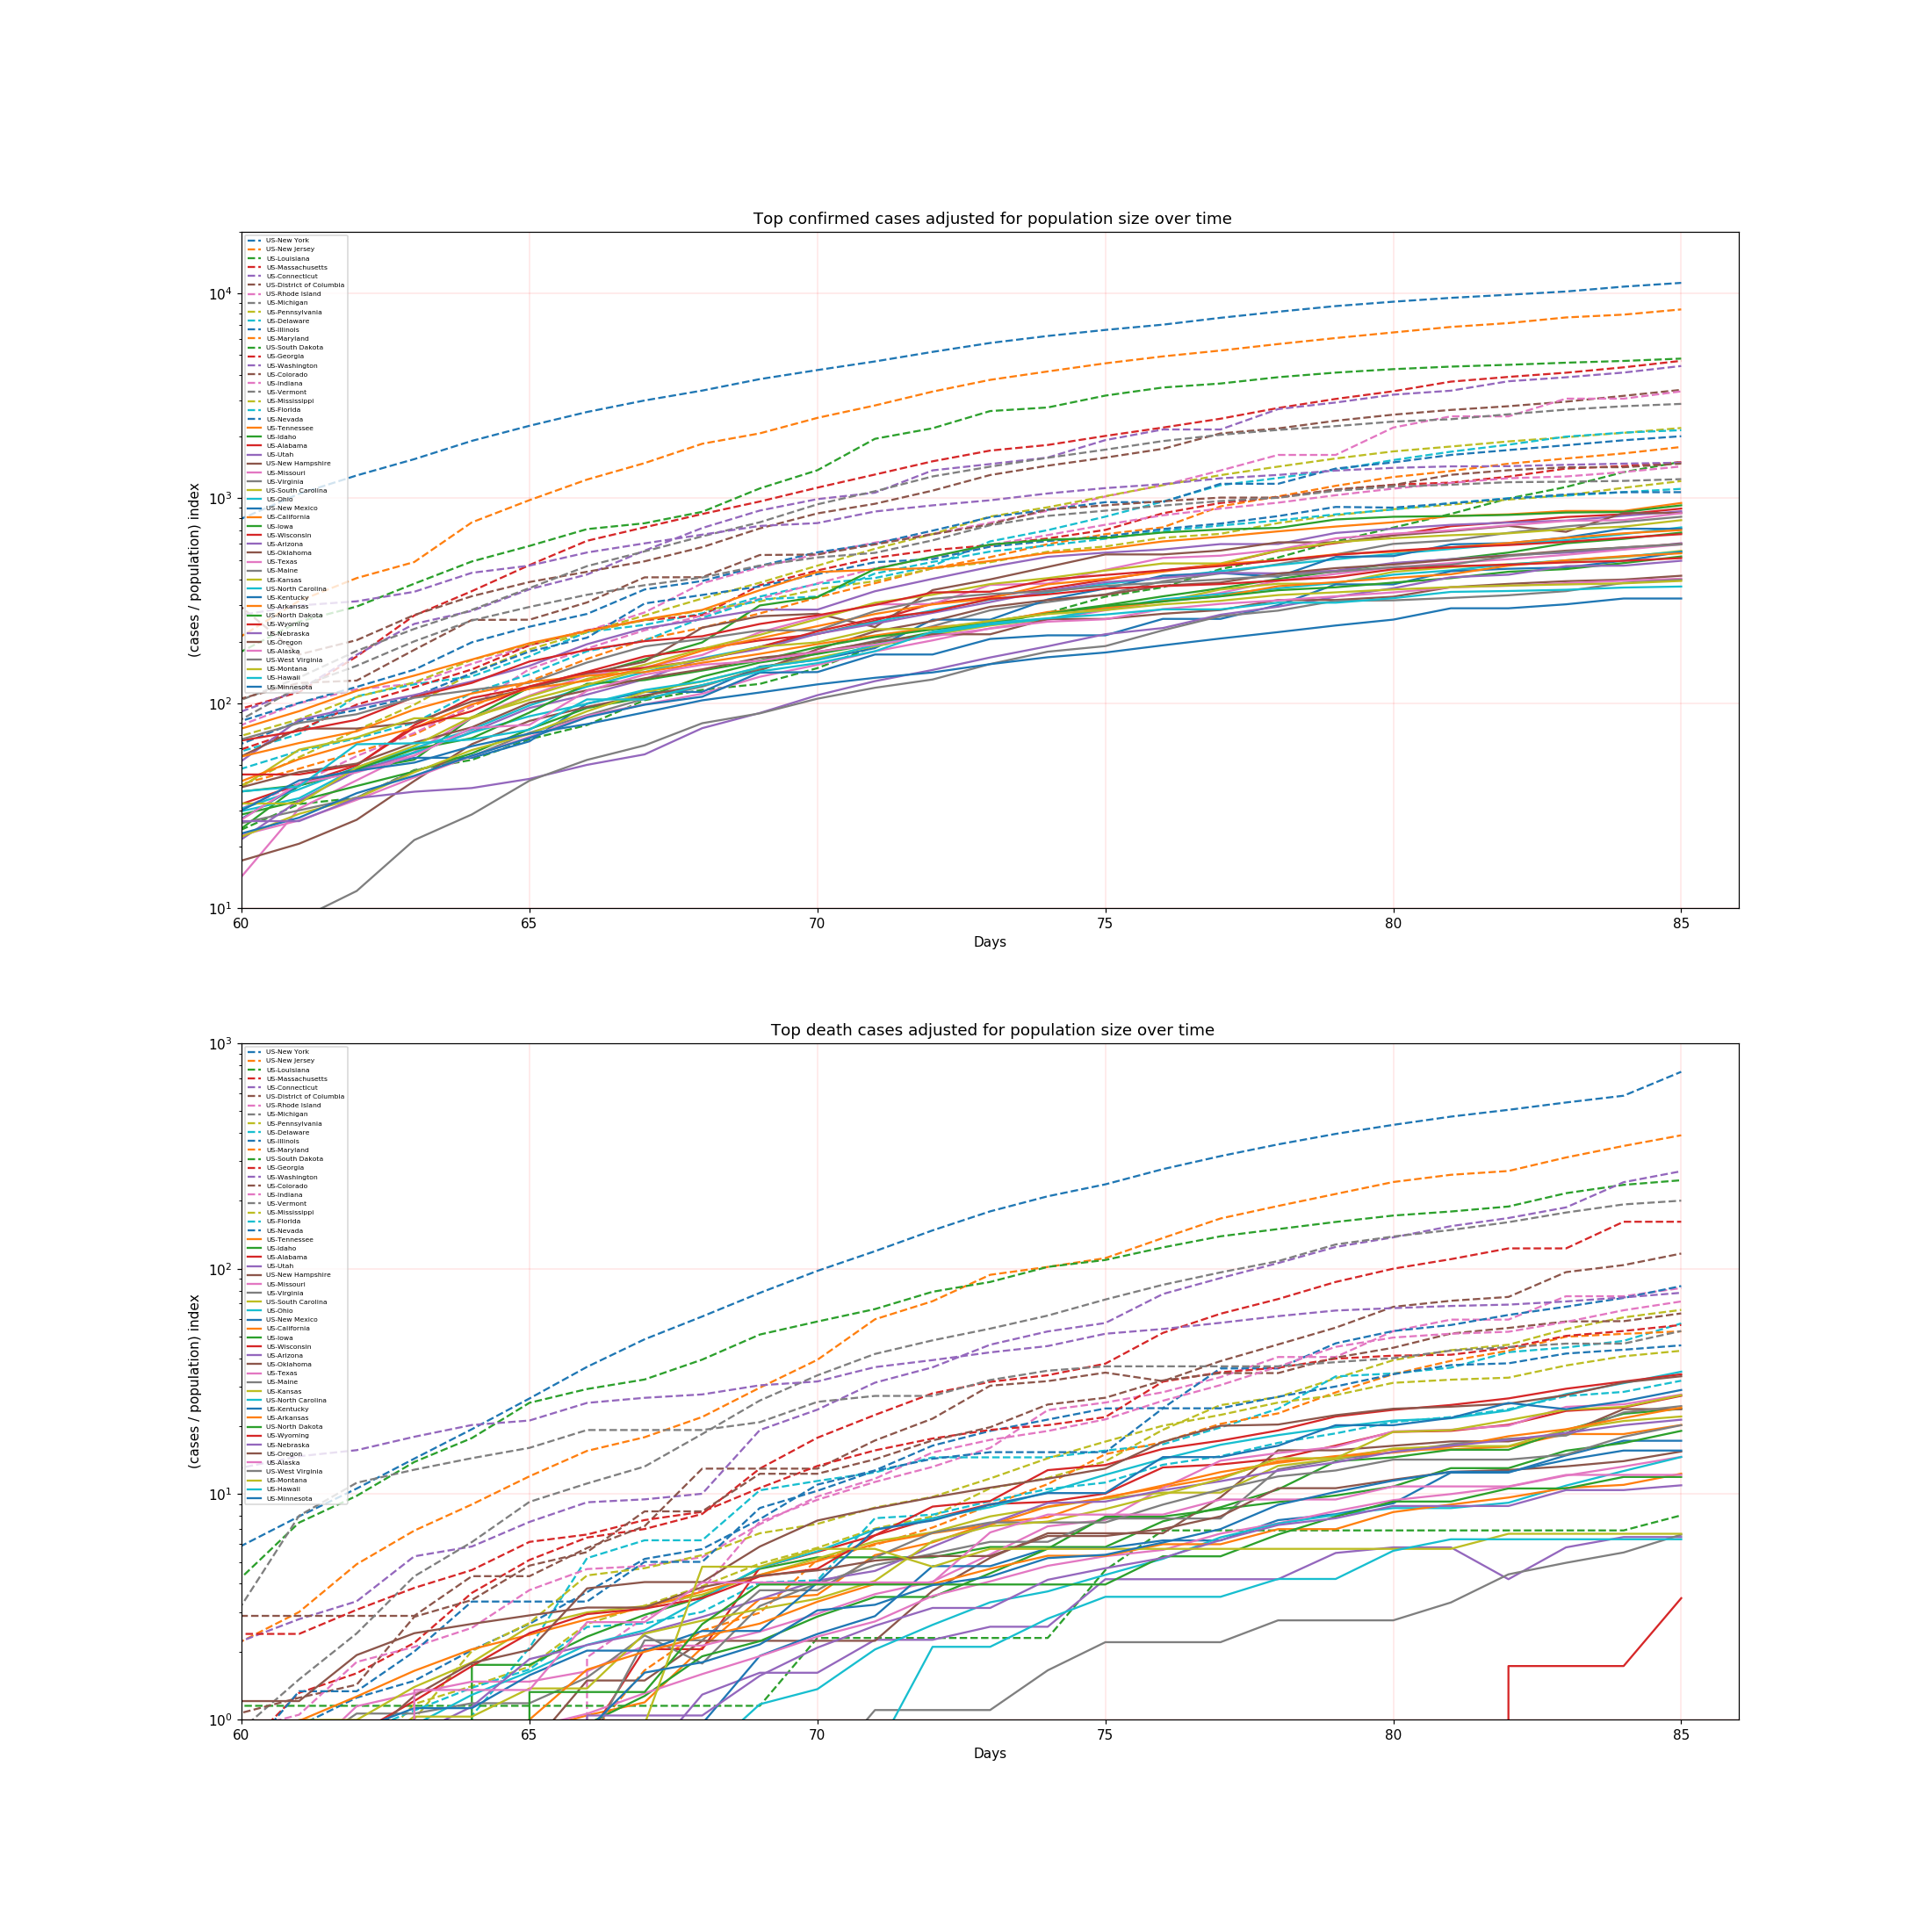

dict_keys(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan', 'New Jersey', 'Virginia', 'Washington', 'Arizona', 'Massachusetts', 'Tennessee', 'Indiana', 'Missouri', 'Maryland', 'Wisconsin', 'Colorado', 'Minnesota', 'South Carolina', 'Alabama', 'Louisiana', 'Kentucky', 'Oregon', 'Oklahoma', 'Connecticut', 'Iowa', 'Utah', 'Arkansas', 'Nevada', 'Mississippi', 'Kansas', 'New Mexico', 'Nebraska', 'West Virginia', 'Idaho', 'Hawaii', 'New Hampshire', 'Maine', 'Rhode Island', 'Montana', 'Delaware', 'South Dakota', 'North Dakota', 'Alaska', 'District of Columbia', 'Vermont', 'Wyoming'])
New York 11269.068010075565
New Jersey 8362.980235398623
Louisiana 4810.418445772843
Massachusetts 4691.107871720116
Connecticut 4426.978818283166
District of Columbia 3386.3037701809294
Rhode Island 3329.2452830188677
Michigan 2891.889178879743
Pennsylvania 2205.932864949258
Delaware 2151.90360303512
Illinois 2010.46875
Maryland 1781.89028

In [31]:
fig, ax = plt.subplots(2, figsize = (20,20))  

ax[0].set_xlim(60, days)
ax[0].set_ylim(10, 20000)
ax[0].set_title(" Top confirmed cases adjusted for population size over time")
ax[0].set_ylabel("(cases / population) index")
ax[0].set_xlabel("Days")
ax[0].set_yscale('log', basey=10)


ax[1].set_xlim(60, days)
ax[1].set_ylim(1, 1000)
ax[1].set_title(" Top death cases adjusted for population size over time")
ax[1].set_ylabel("(cases / population) index")
ax[1].set_xlabel("Days")
ax[1].set_yscale('log', basey=10)

#ax[2].set_xlim(60, days)
##ax[2].set_ylim(1, 1000)
#ax[2].set_title(" Top recovered cases adjusted for population size over time")
#ax[2].set_ylabel("(cases / population) index")
#ax[2].set_xlabel("Days")
#ax[2].set_yscale('log', basey=10)
                        
print(population_dict.keys())
                        
# Daily total for all of the cities summed together
for CNT in state_conf_adjust_sort:
    #print(CNT)
    cnt   = str(CNT[0]).split('-')[0]
    state = str(CNT[0]).split('-')[1]
    if (str(population_dict.keys()).find(state) >= 0) and ("US" in cnt):
            #print(CNT[0])
            x = range(0,len(state_conf_dict[CNT[0]]))

            y1 = state_conf_dict[CNT[0]]  / population_dict[state]
            y2 = state_death_dict[CNT[0]] /  population_dict[state]
            y3 = state_rec_dict[CNT[0]]   /  population_dict[state]
            print(state,y1[len(y1)-1])
            if (y1[len(y1)-1] > 1000.0):
                ax[0].plot(x,y1, label=CNT[0], linestyle='--' )
                ax[1].plot(x,y2, label=CNT[0], linestyle='--')
                #ax[2].plot(x,y3, label=CNT[0], linestyle='--')
            else:
                ax[0].plot(x,y1, label=CNT[0] )
                ax[1].plot(x,y2, label=CNT[0] )
                #ax[2].plot(x,y3, label=CNT[0] )
                
            ax[0].grid(color='r', linestyle='-', linewidth=0.1)
            ax[1].grid(color='r', linestyle='-', linewidth=0.1)
            #ax[2].grid(color='r', linestyle='-', linewidth=0.1)
            
ax[0].legend(loc="upper left", fontsize='5')  
ax[1].legend(loc="upper left", fontsize='5')   
#ax[2].legend(loc="upper left", fontsize='5')    
    

#####################################################################<br></br>
<br></br>
Log plot - Confirmed only<br></br>
<br></br>
#####################################################################<br></br>

<IPython.core.display.Javascript object>


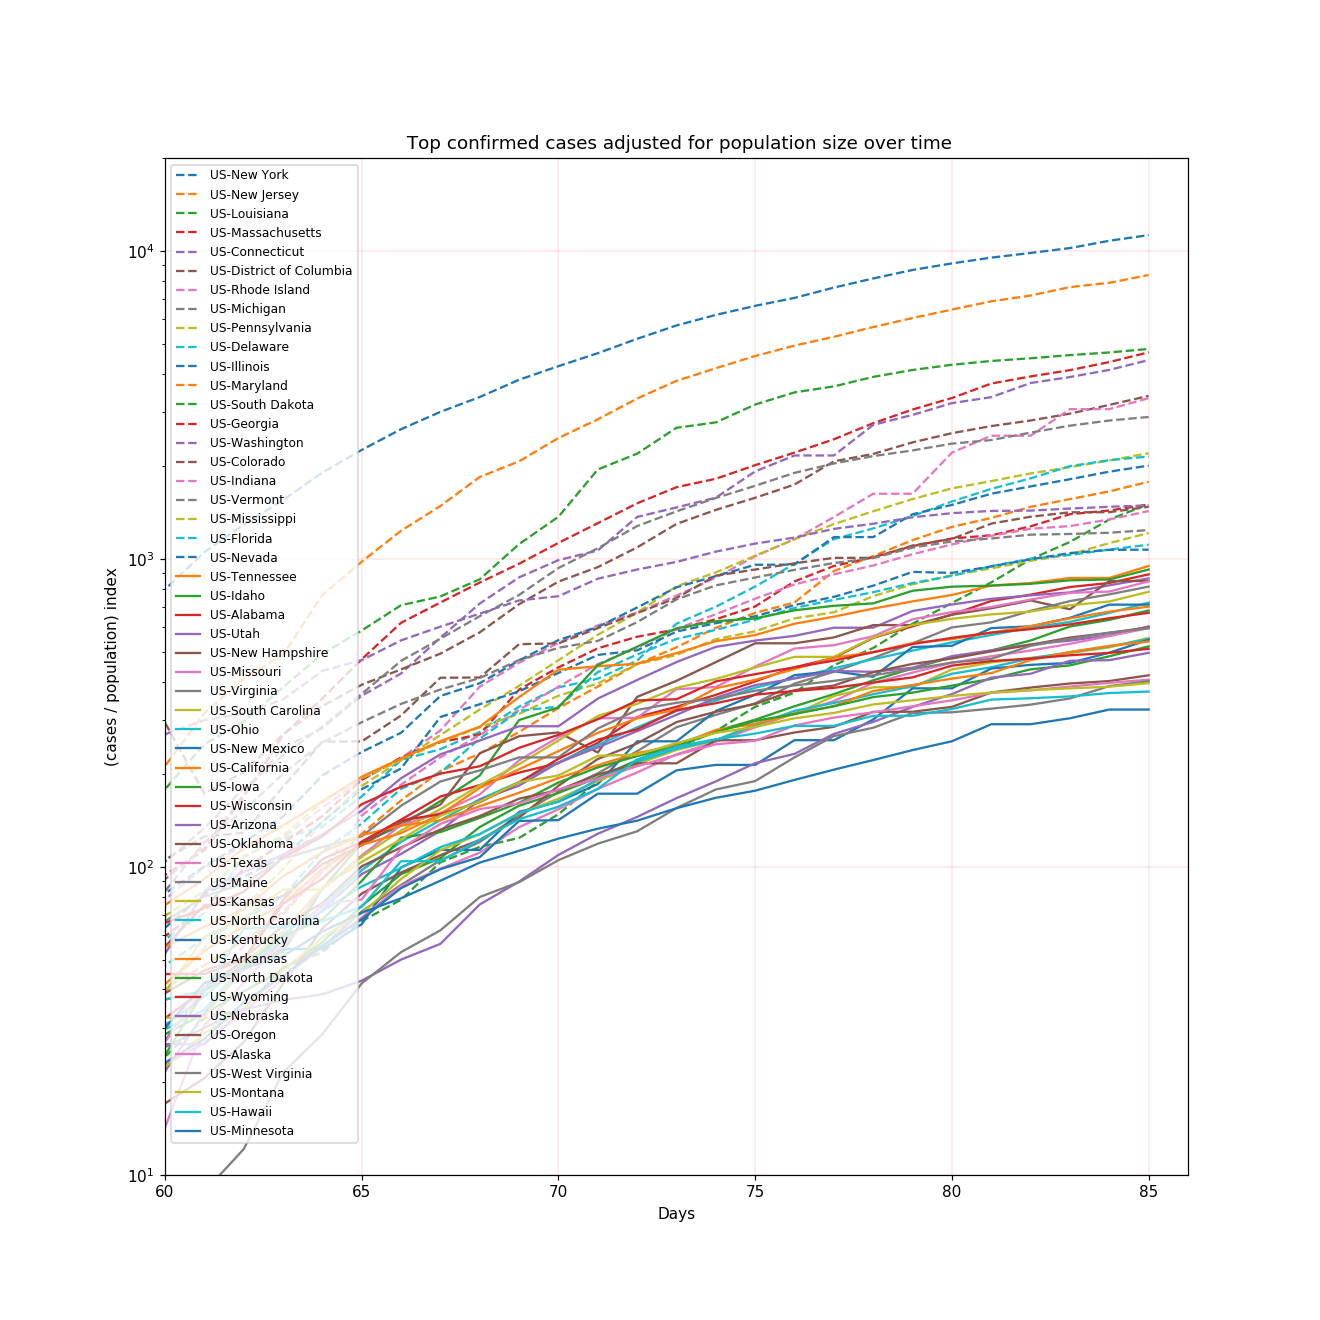

dict_keys(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan', 'New Jersey', 'Virginia', 'Washington', 'Arizona', 'Massachusetts', 'Tennessee', 'Indiana', 'Missouri', 'Maryland', 'Wisconsin', 'Colorado', 'Minnesota', 'South Carolina', 'Alabama', 'Louisiana', 'Kentucky', 'Oregon', 'Oklahoma', 'Connecticut', 'Iowa', 'Utah', 'Arkansas', 'Nevada', 'Mississippi', 'Kansas', 'New Mexico', 'Nebraska', 'West Virginia', 'Idaho', 'Hawaii', 'New Hampshire', 'Maine', 'Rhode Island', 'Montana', 'Delaware', 'South Dakota', 'North Dakota', 'Alaska', 'District of Columbia', 'Vermont', 'Wyoming'])
New York 11269.068010075565
New Jersey 8362.980235398623
Louisiana 4810.418445772843
Massachusetts 4691.107871720116
Connecticut 4426.978818283166
District of Columbia 3386.3037701809294
Rhode Island 3329.2452830188677
Michigan 2891.889178879743
Pennsylvania 2205.932864949258
Delaware 2151.90360303512
Illinois 2010.46875
Maryland 1781.89028

In [33]:
fig, ax = plt.subplots(figsize = (12,12))  

ax.set_xlim(60, days)
ax.set_ylim(10, 20000)
ax.set_title(" Top confirmed cases adjusted for population size over time")
ax.set_ylabel("(cases / population) index")
ax.set_xlabel("Days")
ax.set_yscale('log', basey=10)  

print(population_dict.keys())
                        
# Daily total for all of the cities summed together
for CNT in state_conf_adjust_sort:
    #print(CNT)
    cnt   = str(CNT[0]).split('-')[0]
    state = str(CNT[0]).split('-')[1]
    if (str(population_dict.keys()).find(state) >= 0) and ("US" in cnt):
            #print(CNT[0])
            x = range(0,len(state_conf_dict[CNT[0]]))

            y1 = state_conf_dict[CNT[0]] / population_dict[state]
            y2 = state_death_dict[CNT[0]] /  population_dict[state]
            print(state,y1[len(y1)-1])
            if (y1[len(y1)-1] > 1000.0):
                ax.plot(x,y1, label=CNT[0], linestyle='--' )
            else:
                ax.plot(x,y1, label=CNT[0] )
                
            ax.grid(color='r', linestyle='-', linewidth=0.1)
            
ax.legend(loc="upper left", fontsize='8')    
    

#####################################################################<br></br>
<br></br>
Log plot - Death only<br></br>
<br></br>
#####################################################################<br></br>

<IPython.core.display.Javascript object>


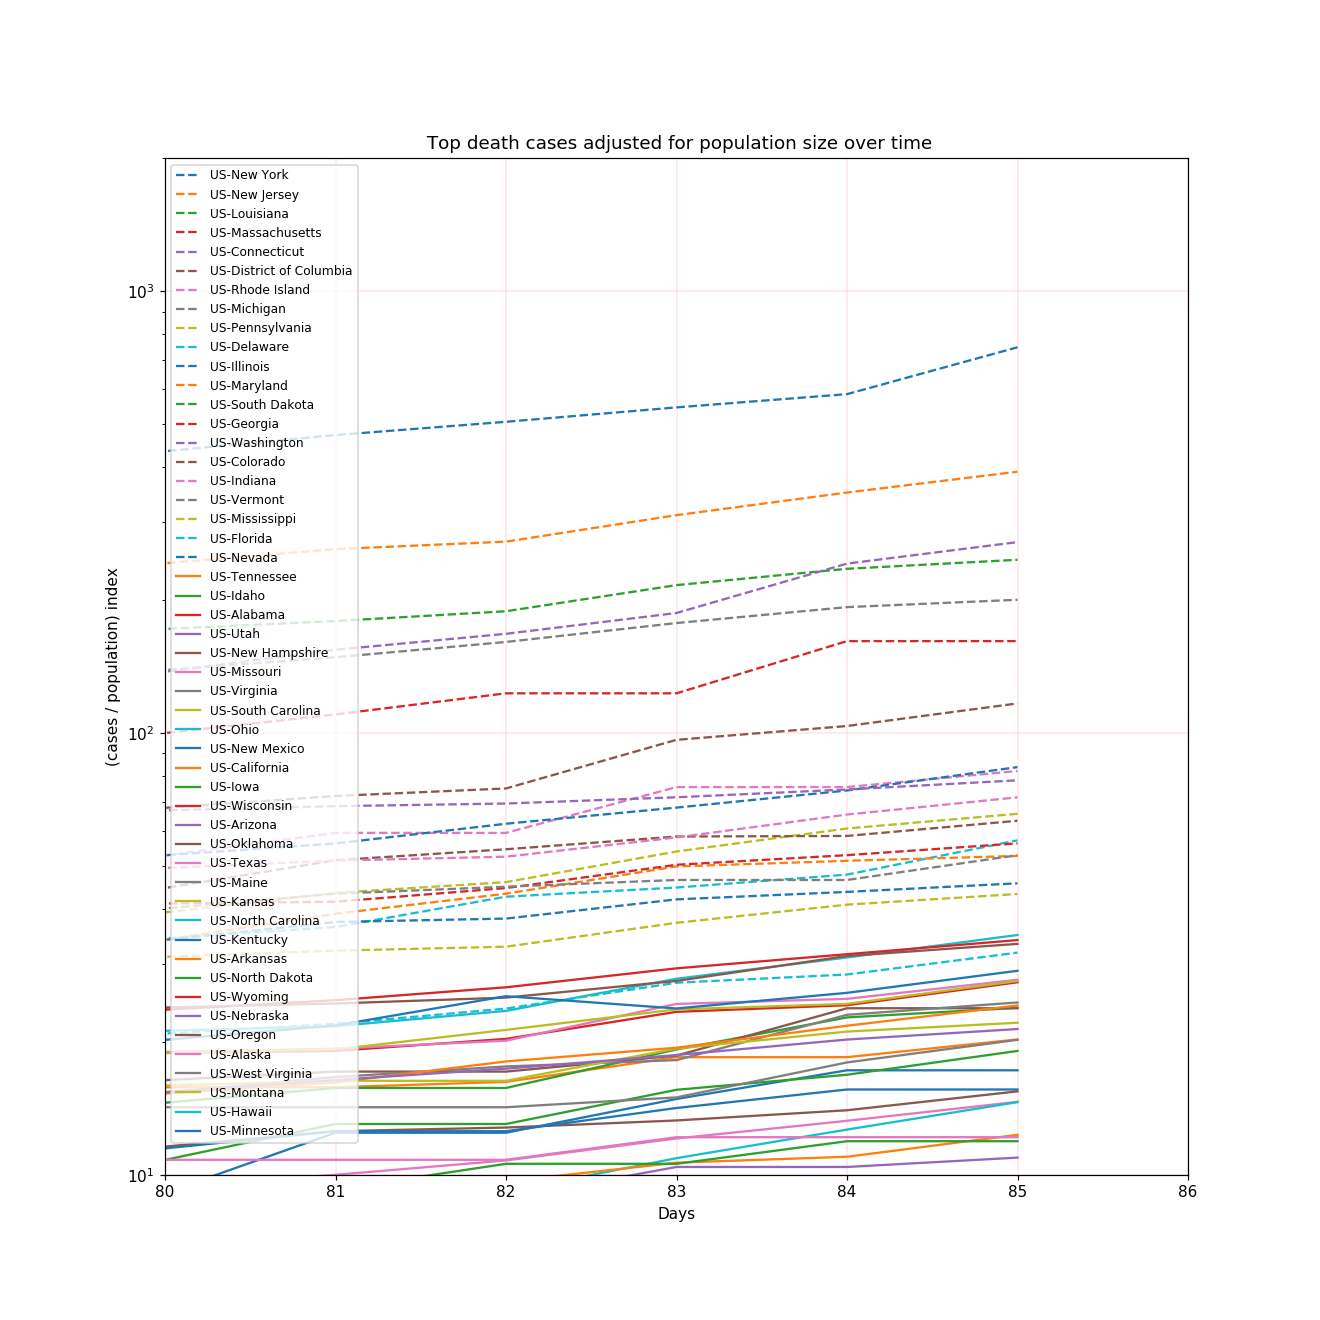

dict_keys(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan', 'New Jersey', 'Virginia', 'Washington', 'Arizona', 'Massachusetts', 'Tennessee', 'Indiana', 'Missouri', 'Maryland', 'Wisconsin', 'Colorado', 'Minnesota', 'South Carolina', 'Alabama', 'Louisiana', 'Kentucky', 'Oregon', 'Oklahoma', 'Connecticut', 'Iowa', 'Utah', 'Arkansas', 'Nevada', 'Mississippi', 'Kansas', 'New Mexico', 'Nebraska', 'West Virginia', 'Idaho', 'Hawaii', 'New Hampshire', 'Maine', 'Rhode Island', 'Montana', 'Delaware', 'South Dakota', 'North Dakota', 'Alaska', 'District of Columbia', 'Vermont', 'Wyoming'])
New York 11269.068010075565
New Jersey 8362.980235398623
Louisiana 4810.418445772843
Massachusetts 4691.107871720116
Connecticut 4426.978818283166
District of Columbia 3386.3037701809294
Rhode Island 3329.2452830188677
Michigan 2891.889178879743
Pennsylvania 2205.932864949258
Delaware 2151.90360303512
Illinois 2010.46875
Maryland 1781.89028

In [36]:
fig, ax = plt.subplots(figsize = (12,12))  

ax.set_xlim(80, days)
ax.set_ylim(10, 2000)
ax.set_title(" Top death cases adjusted for population size over time")
ax.set_ylabel("(cases / population) index")
ax.set_xlabel("Days")
ax.set_yscale('log', basey=10)  


print(population_dict.keys())
                        
# Daily total for all of the cities summed together
for CNT in state_conf_adjust_sort:
    #print(CNT)
    cnt   = str(CNT[0]).split('-')[0]
    state = str(CNT[0]).split('-')[1]
    if (str(population_dict.keys()).find(state) >= 0) and ("US" in cnt):
            #print(CNT[0])
            x = range(0,len(state_conf_dict[CNT[0]]))

            y1 = state_conf_dict[CNT[0]] / population_dict[state]
            y2 = state_death_dict[CNT[0]] /  population_dict[state]
            print(state,y1[len(y1)-1])
            if (y1[len(y1)-1] > 1000.0):
                ax.plot(x,y2, label=CNT[0], linestyle='--' )
            else:
                ax.plot(x,y2, label=CNT[0] )
                
            ax.grid(color='r', linestyle='-', linewidth=0.1)
            
ax.legend(loc="upper left", fontsize='8')    